In [6]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from keras.applications.vgg16 import VGG16
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.preprocessing.image import load_img

model = VGG16()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [ ]:
#vgg labels
# https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json

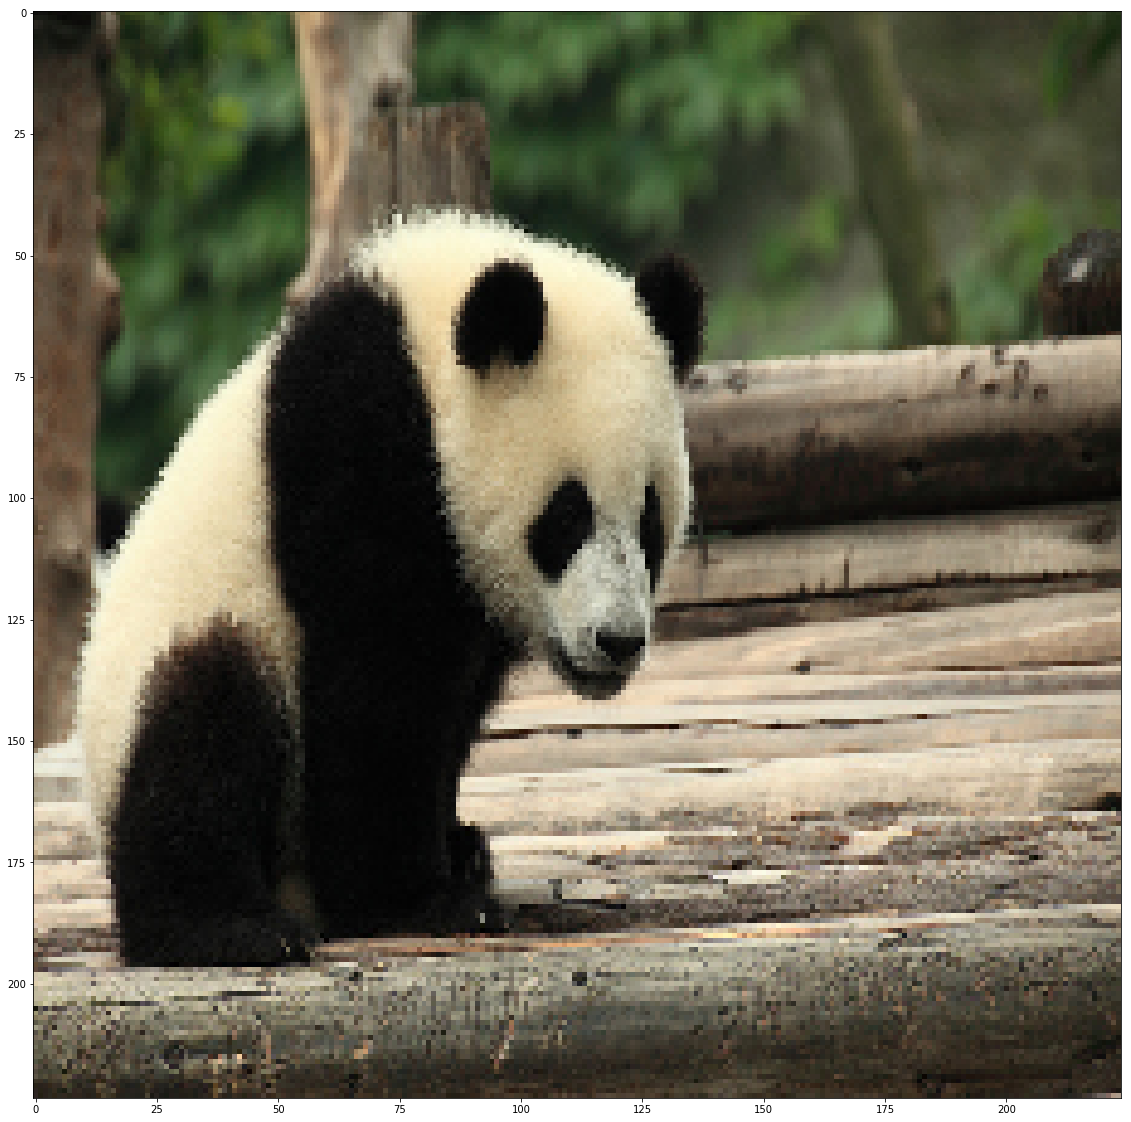

In [4]:
panda_image = load_img('./pandas-for-data-analysis.jpg', target_size=(224, 224))
plt.figure(figsize=(20, 20))
plt.imshow(panda_image)

In [7]:
# convert the image pixels to a numpy array
image = img_to_array(panda_image)

# reshape data for the model
image = np.expand_dims(image, axis=0)

# prepare the image for the VGG model
image = preprocess_input(image)

# predict the probability across all output classes
yhat = model.predict(image)

# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
most_likely_label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (most_likely_label[1], most_likely_label[2]*100))

giant_panda (99.96%)


In [8]:
label[0]

[('n02510455', 'giant_panda', 0.99959975),
 ('n02445715', 'skunk', 0.0001676529),
 ('n02447366', 'badger', 0.00013132524),
 ('n02509815', 'lesser_panda', 7.5473894e-05),
 ('n02443114', 'polecat', 6.1703563e-06)]

In [ ]:
from copy import deepcopy
original_image = deepcopy(image[0])
original_image *= 255/original_image.max()
cv2.imwrite("original_panda.png", original_image)

In [ ]:
explainer = lime_image.LimeImageExplainer()

In [ ]:
explanation = explainer.explain_instance(image[0], model.predict, top_labels=5, hide_color=None, num_samples=1000)

In [ ]:
explanation.top_labels

In [ ]:
def get_segmentation(explanation, label, positive_only=True, num_features=5, hide=True):
    temp, mask = explanation.get_image_and_mask(label, positive_only=positive_only, num_features=num_features, hide_rest=hide)
    normalised = (temp - temp.min()) / (temp.max()-temp.min())
    print(normalised.min(), normalised.max())
    marked_image = mark_boundaries(normalised, mask)
    return marked_image

In [ ]:
import cv2

In [ ]:
plt.figure(figsize=(15, 15))
top_features = get_segmentation(explanation, 388, True, 5, False)
plt.imshow(top_features)
top_features *= 255/top_features.max()

In [ ]:
cv2.imwrite("top_giantpanda_features.png", top_features)

In [ ]:
plt.figure(figsize=(15, 15))
skunk_top_features = get_segmentation(explanation, 361, True, 1, False)
plt.imshow(skunk_top_features)
skunk_top_features *= 255/skunk_top_features.max()
# cv2.imwrite("top_skunk_features.png", skunk_top_features)

In [ ]:
decode_predictions(yhat, top=1000)

In [ ]:
temp, mask = explanation.get_image_and_mask(361, positive_only=True, num_features=5, hide_rest=True)